In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, asc, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# get columns for stations
station_columns = inspector.get_columns('station')
for column in station_columns:
    print (column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# get columns for measurement
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print (column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print (f" The most recent date in the data set is: {recent_date[0]}")

 The most recent date in the data set is: 2017-08-23


In [12]:
earlieststr = session.query(Measurement.date).order_by(Measurement.date).first()
lateststr = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Earliest: {earlieststr[0]} , Latest: {lateststr[0]}")

Earliest: 2010-01-01 , Latest: 2017-08-23


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


latestdate = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
latestdate


# Calculate the date one year from the last date in data set.
querydate = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
querydate
lastyear_precipitation = session.query(Measurement.prcp).order_by(desc(Measurement.prcp)).all()
lastyear_precipitation

# Perform a query to retrieve the data and precipitation scores

lastyear = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= '2016-08-23').all()
lastyear



# Save the query results as a Pandas DataFrame and set the index to the date column
lastyear_df = pd.DataFrame(lastyear)
lastyear_df = lastyear_df.set_index("date")
lastyear_df.head()

# Sort the dataframe by date
lastyear_df = lastyear_df.sort_values(by = 'date')

lastyear_df = lastyear_df.dropna()

lastyear_df.head()

,prcp
date,
2016-08-23,0.0
2016-08-23,45.5
2016-08-23,1.3
2016-08-23,3.8
2016-08-23,17.8


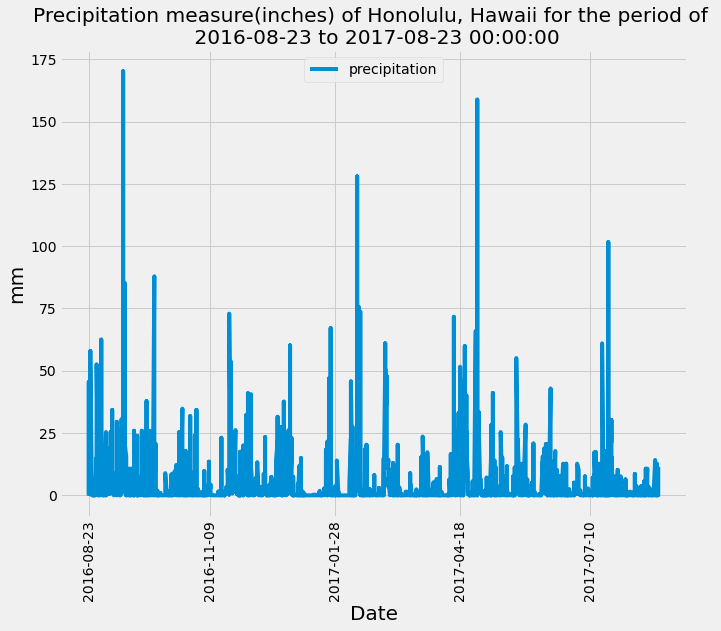

In [42]:
# Use Pandas Plotting with Matplotlib to plot the data


# set figure size
plt.figure(figsize=(10, 8))
plt.plot(lastyear_df.index, lastyear_df['prcp'])

# set dates (x location)
x = ['2016-08-23', '2016-11-09', '2017-01-28', '2017-04-18', '2017-07-10']

# set ticks
plt.xticks(x, rotation='vertical')

# set label, legend & title
plt.xlabel('Date', size='20')
plt.ylabel('mm', size='20')
plt.title(f'Precipitation measure(inches) of Honolulu, Hawaii for the period of \n {querydate} to {latestdate}')
plt.legend(['precipitation'], loc=9)
# show plot
plt.show();

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
lastyear_df.describe()

,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station.id).count()
total_stations

9

In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active_stations = session.query


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()